In [1]:
import pandas_datareader.data as web
import pandas as pd
import datetime 
from datetime import date
from fbprophet import Prophet
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

/Users/shovitraj/opt/anaconda3/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
today = date.today()
today

datetime.date(2020, 7, 13)

In [3]:

start = datetime.datetime(1980,1,1)
end = today

[Check Index Names Here](https://finance.yahoo.com)

In [4]:
ticker=input("Enter index name:")

Enter index name:^GSPC


In [5]:
title =  "{} Stock Price"

In [6]:
data = web.DataReader(ticker, 'yahoo', start, end)
data.head()

High         Low        Open       Close    Volume  \
Date                                                                   
1980-01-02  108.430000  105.290001  107.940002  105.760002  40610000   
1980-01-03  106.080002  103.260002  105.760002  105.220001  50480000   
1980-01-04  107.080002  105.089996  105.220001  106.519997  39130000   
1980-01-07  107.800003  105.800003  106.519997  106.809998  44500000   
1980-01-08  109.290001  106.290001  106.809998  108.949997  53390000   

             Adj Close  
Date                    
1980-01-02  105.760002  
1980-01-03  105.220001  
1980-01-04  106.519997  
1980-01-07  106.809998  
1980-01-08  108.949997

In [7]:
#if you want to import as csv
data.to_csv(ticker+'.csv')

In [19]:
#reading csv
data = pd.read_csv(ticker+'.csv', parse_dates=True)

In [20]:
#checking if we have the same dataset as amazon.head()
data.head() 

Date        High         Low        Open       Close    Volume  \
0  1980-01-02  108.430000  105.290001  107.940002  105.760002  40610000   
1  1980-01-03  106.080002  103.260002  105.760002  105.220001  50480000   
2  1980-01-04  107.080002  105.089996  105.220001  106.519997  39130000   
3  1980-01-07  107.800003  105.800003  106.519997  106.809998  44500000   
4  1980-01-08  109.290001  106.290001  106.809998  108.949997  53390000   

    Adj Close  
0  105.760002  
1  105.220001  
2  106.519997  
3  106.809998  
4  108.949997

In [21]:
data.describe()

High           Low          Open         Close        Volume  \
count  10220.000000  10220.000000  10220.000000  10220.000000  1.022000e+04   
mean    1030.956483   1018.458901   1024.925375   1025.136956  1.714852e+09   
std      778.132934    770.190578    774.386339    774.415759  1.815977e+09   
min       99.580002     94.230003     98.220001     98.220001  1.499000e+07   
25%      335.804993    332.117493    333.722496    333.747498  1.739775e+08   
50%     1013.105011    996.255005   1005.650024   1005.779999  9.290000e+08   
75%     1398.432526   1377.687531   1388.154999   1388.774994  3.266212e+09   
max     3393.520020   3378.830078   3380.449951   3386.149902  1.145623e+10   

          Adj Close  
count  10220.000000  
mean    1025.136956  
std      774.415759  
min       98.220001  
25%      333.747498  
50%     1005.779999  
75%     1388.774994  
max     3386.149902

In [22]:
#3 day moving average
data['MAvg']=data.Close.rolling(365).mean()
#7 day moving averge
#data['MAvg7']=data.Close.rolling(7).mean()
data.head()

Date        High         Low        Open       Close    Volume  \
0  1980-01-02  108.430000  105.290001  107.940002  105.760002  40610000   
1  1980-01-03  106.080002  103.260002  105.760002  105.220001  50480000   
2  1980-01-04  107.080002  105.089996  105.220001  106.519997  39130000   
3  1980-01-07  107.800003  105.800003  106.519997  106.809998  44500000   
4  1980-01-08  109.290001  106.290001  106.809998  108.949997  53390000   

    Adj Close  MAvg  
0  105.760002   NaN  
1  105.220001   NaN  
2  106.519997   NaN  
3  106.809998   NaN  
4  108.949997   NaN

In [23]:
fig1=go.Figure()
fig1.add_trace(go.Scatter(x=data.Date, y=data.High, 
              mode ='lines',
              name='High', 
              line=dict(color='Red', width=1)))
fig1.add_trace(go.Scatter(x=data.Date, y=data.Low, 
                          mode='lines',
                          name='Low',
              line=dict(color='green', width=1)))
fig1.add_trace(go.Scatter(x=data.Date, y=data.Open,
                          mode='lines',
                          name='Open',
              line=dict(color='Blue', width=1)))
fig1.add_trace(go.Scatter(x=data.Date, y=data.Open, 
                          mode='lines',
                          name='Close',
              line=dict(color='purple', width=1)))

fig1.add_trace(go.Scatter(x=data.Date, y=data.MAvg, 
                          mode='lines',
                          name='Moving Avg',
              line=dict(color='orange', width=1)))

#fig1.add_trace(go.Scatter(x=data.Date, y=data.MAvg7, 
 #                         mode='lines',
  #                        name='Moving Avg 7 days',
   #           line=dict(color='lime', width=1)))
# Edit the layout
fig1.update_layout(title=print(title.format(ticker)),
                   xaxis_title='Date',
                   yaxis_title='Price in USD')

fig1.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=6, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig1.show()


^GSPC Stock Price


In [13]:
fig2=go.Figure()
fig2.add_trace(go.Scatter(x=data.Date, y=data.Volume, 
              mode ='lines',
              name='Volume', 
              line=dict(color='skyblue', width=1)))

fig2.update_layout(title=print(title.format(ticker)),
                   xaxis_title='Date',
                   yaxis_title='Volume')

fig2.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=6, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig2.show()

^GSPC Stock Price


In [14]:
# Rename the features: These names are NEEDED for the model fitting
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset

In [15]:

m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


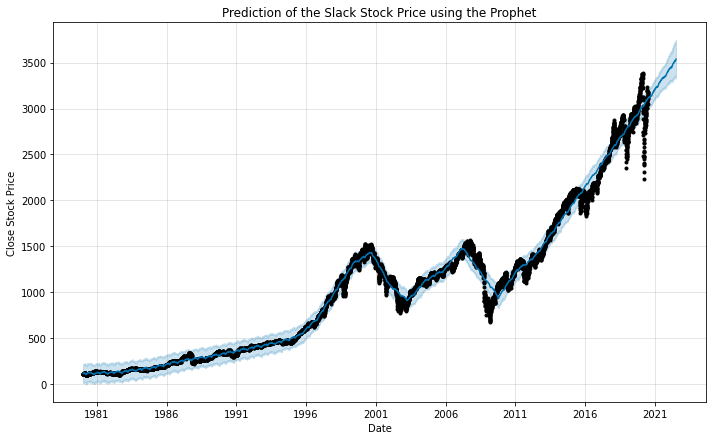

In [16]:
future = m.make_future_dataframe(periods=730) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Slack Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

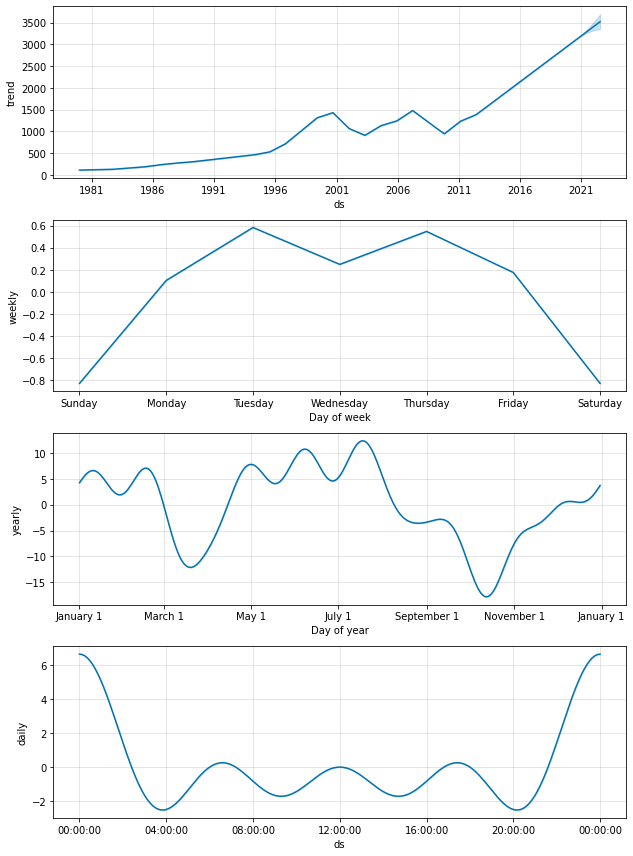

In [17]:
m.plot_components(prediction)
plt.show()